<a href="https://colab.research.google.com/github/19pa1a0476/MACHINE-LEARNING-PROJECT/blob/decision_tree/DecisionTreeModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print(sk.__version__)

1.2.2


In [ ]:
# prompt: install scikit learn

!pip install -U scikit-learn==1.0.2
import sklearn
sklearn.__version__


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.shape

(150, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Species'>

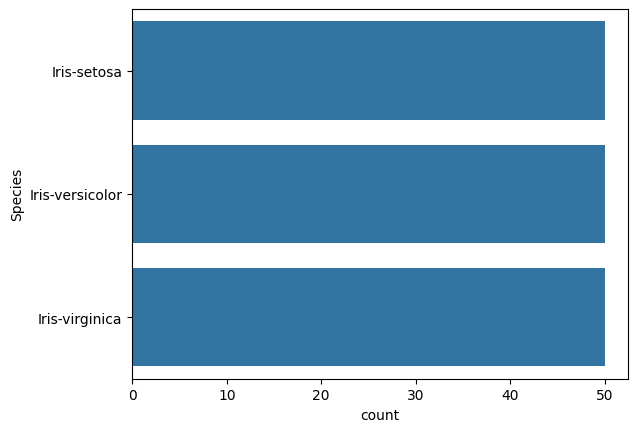

In [12]:
sns.countplot(data["Species"])

In [13]:
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


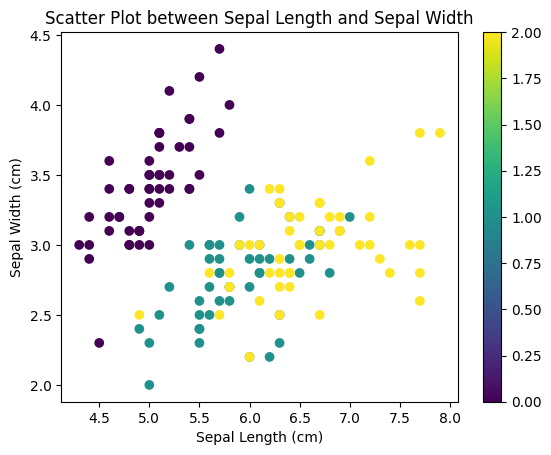

In [15]:
#scatter plot brtween sepallengthcm and sepal width

import matplotlib.pyplot as plt
plt.scatter(data["SepalLengthCm"], data["SepalWidthCm"],c=data['Species'])
plt.colorbar()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot between Sepal Length and Sepal Width")
plt.show()


In [16]:
#   delete id from data set

data.drop('Id',axis=1,inplace=True)


In [17]:
x = data.drop(columns=['Species'],axis=1)
y = data['Species']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [20]:
# prompt: build decision tree classifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [22]:
# prompt: predict for traing as well as testing

# Predict for training as well as testing
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Print the actual and predicted values for training and testing
print("Actual and Predicted Values for Training:")
print(accuracy_score(y_train, y_train_pred))
print("\nActual and Predicted Values for Testing:")
print(accuracy_score(y_test, y_test_pred))


Actual and Predicted Values for Training:
1.0

Actual and Predicted Values for Testing:
1.0


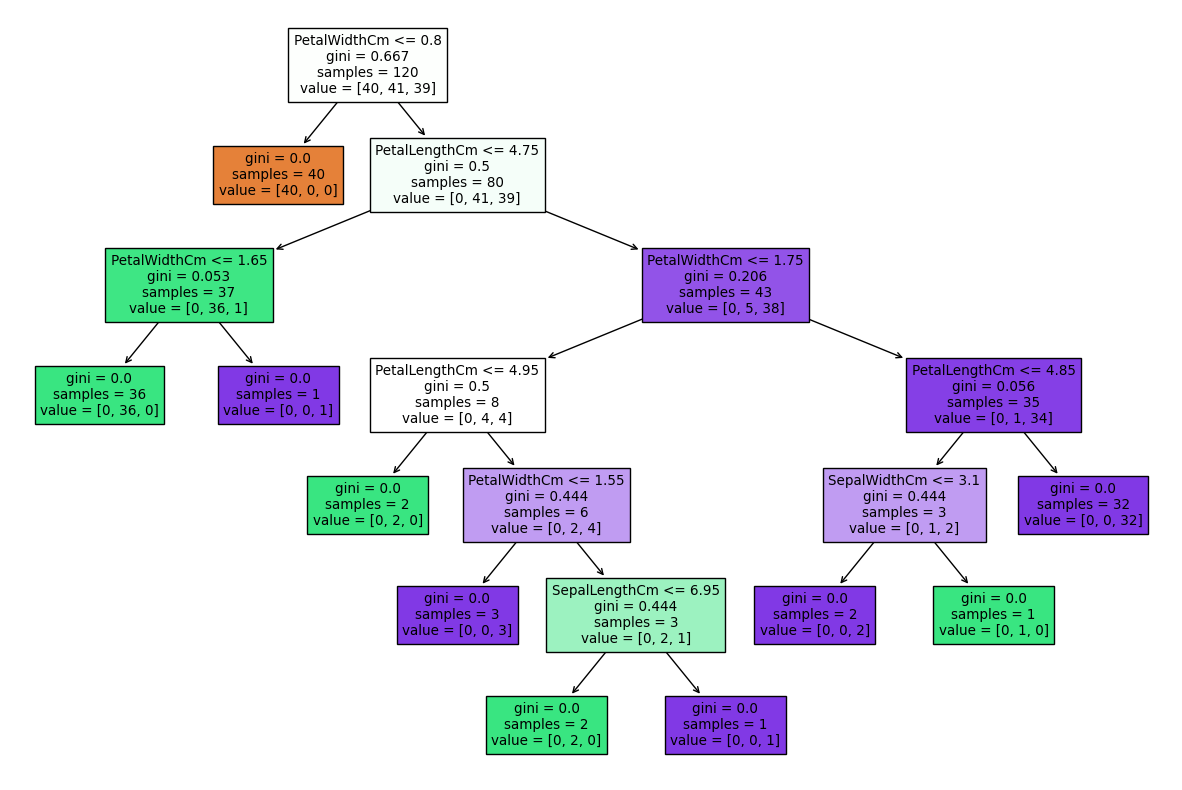

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=x.columns)
plt.savefig('Iris-Decision-Tree.png')
plt.show()

In [27]:
def_importance = pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
def_importance

,feature,importance
0,SepalLengthCm,0.016670
1,SepalWidthCm,0.016670
2,PetalLengthCm,0.389265
3,PetalWidthCm,0.577395


In [28]:
import pickle

In [30]:
with open('iris_classifier.pickle','wb') as f:
  pickle.dump(model,f)